<h2> Supermarket sales analysis

<h4> Objective 

In this notebook we will be analysing our dataset of supermarket sales to check for correlation between variables and identifying trends. 

<h4> Importing required libraries

In [1]:
# Data manipulation
import pandas as pd 

import numpy as np 

#Data visualisation
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

<h4> Importing dataset 

In [2]:
supermarket_sales = pd.read_csv('supermarket_sales - sheet1.csv')

In [3]:
supermarket_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03/02/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02/09/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


<h4> Data audit

In [4]:
# First five rows of the dataset 
supermarket_sales.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
# Last five rows of the dataset
supermarket_sales.tail(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03/02/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02/09/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [6]:
# Shape of the dataset 
supermarket_sales.shape

(1000, 17)

In [30]:
# Checking missing values in the dataset 
supermarket_sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
month                      0
dtype: int64

In [7]:
# Columns present in the dataset
supermarket_sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [8]:
# A concise summary of the dataset
supermarket_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [10]:
# Getting descriptive statistics summary 
supermarket_sales.describe 

<bound method NDFrame.describe of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyl

<h4> Exploratory data analysis

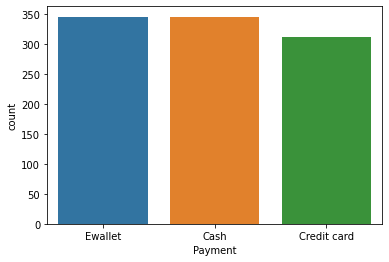

In [38]:
# Plotting frequency of the method of payment
sns.countplot(x='Payment', data=supermarket_sales)
plt.show()

In [11]:
# Looking at the total in reference to Product line

Total = Unit price x Quantity

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

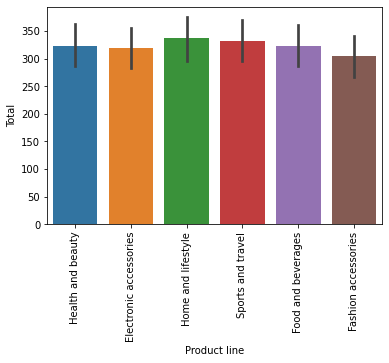

In [14]:
# Finding the mean Total in each of the given product lines
sns.barplot(x="Product line", data=supermarket_sales, y="Total")
plt.xticks(rotation='vertical', size = 10)

In [31]:
# Checking for the Product line minimum and maximum Total
supermarket_sales['Total'].min()

10.6785

In [32]:
supermarket_sales['Total'].max()

1042.65

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'Unit price'),
  Text(2, 0, 'Quantity'),
  Text(3, 0, 'Tax 5%'),
  Text(4, 0, 'Total'),
  Text(5, 0, 'cogs'),
  Text(6, 0, 'gross margin percentage'),
  Text(7, 0, 'gross income'),
  Text(8, 0, 'Rating')])

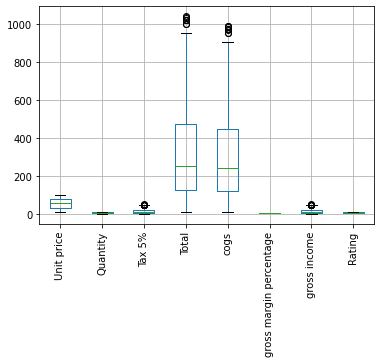

In [15]:
# Boxplot to find out distribution of Total in the data set in comparison to the mean
supermarket_sales.boxplot()
plt.xticks(rotation='vertical', size = 10)

<AxesSubplot:xlabel='Branch', ylabel='Total'>

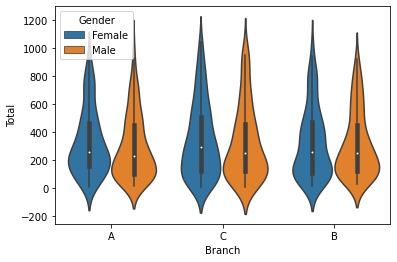

In [37]:
# Finding distribution of Total in purchases by Gender, in each respected Branch
sns.violinplot(x="Branch", y="Total", hue="Gender", data=supermarket_sales)

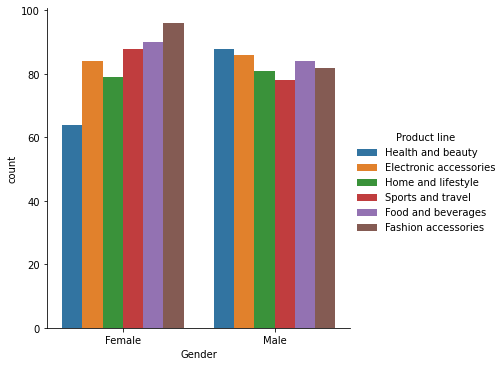

In [34]:
# Finding out the frequency of individual product purchases by Gender in each of the Product lines
sns.catplot(x="Gender", hue="Product line", kind="count", data=supermarket_sales)

In [16]:
#Getting month and time from the dataset 
supermarket_sales['month'] = supermarket_sales['Date']

In [17]:
supermarket_sales['Date']

0      01/05/2019
1      03/08/2019
2      03/03/2019
3       1/27/2019
4      02/08/2019
          ...    
995     1/29/2019
996    03/02/2019
997    02/09/2019
998     2/22/2019
999     2/18/2019
Name: Date, Length: 1000, dtype: object

In [18]:
supermarket_sales['Time']

0      13:08
1      10:29
2      13:23
3      20:33
4      10:37
       ...  
995    13:46
996    17:16
997    13:22
998    15:33
999    13:28
Name: Time, Length: 1000, dtype: object

In [19]:
# Finding the total average cost of goods 
np.mean(supermarket_sales['cogs'])

307.58738

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

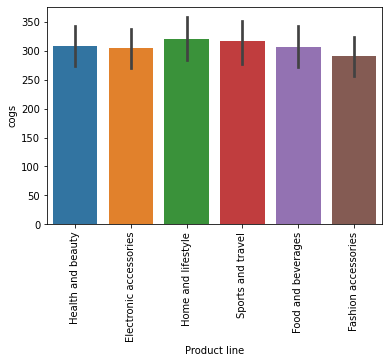

In [20]:
# Finding the average Cost of Goods for each Product Line
sns.barplot(x="Product line", y="cogs", data=supermarket_sales)
plt.xticks(rotation='vertical', size = 10)

In [21]:
# Finding Quantity found in each Product line
supermarket_sales.groupby('Product line').sum()['Quantity']

Product line
Electronic accessories    971
Fashion accessories       902
Food and beverages        952
Health and beauty         854
Home and lifestyle        911
Sports and travel         920
Name: Quantity, dtype: int64

In [22]:
topsales = pd.DataFrame(supermarket_sales.groupby('Product line').sum(['cogs']))

In [23]:
topsales

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Product line,,,,,,,,
Electronic accessories,9103.77,971,2587.5015,54337.5315,51750.03,809.523810,2587.5015,1177.2
Fashion accessories,10173.35,902,2585.9950,54305.8950,51719.90,847.619048,2585.9950,1251.2
Food and beverages,9745.54,952,2673.5640,56144.8440,53471.28,828.571429,2673.5640,1237.7
Health and beauty,8337.88,854,2342.5590,49193.7390,46851.18,723.809524,2342.5590,1064.5
Home and lifestyle,8850.71,911,2564.8530,53861.9130,51297.06,761.904762,2564.8530,1094.0
Sports and travel,9460.88,920,2624.8965,55122.8265,52497.93,790.476190,2624.8965,1148.1


In [41]:
# Sorting cogs column
topsales.sort_values('cogs',ascending='false')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Product line,,,,,,,,
Health and beauty,8337.88,854,2342.5590,49193.7390,46851.18,723.809524,2342.5590,1064.5
Home and lifestyle,8850.71,911,2564.8530,53861.9130,51297.06,761.904762,2564.8530,1094.0
Fashion accessories,10173.35,902,2585.9950,54305.8950,51719.90,847.619048,2585.9950,1251.2
Electronic accessories,9103.77,971,2587.5015,54337.5315,51750.03,809.523810,2587.5015,1177.2
Sports and travel,9460.88,920,2624.8965,55122.8265,52497.93,790.476190,2624.8965,1148.1
Food and beverages,9745.54,952,2673.5640,56144.8440,53471.28,828.571429,2673.5640,1237.7


In [40]:
# Top 3 sales by Product line
topsales[:3]

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Product line,,,,,,,,
Electronic accessories,9103.77,971,2587.5015,54337.5315,51750.03,809.523810,2587.5015,1177.2
Fashion accessories,10173.35,902,2585.9950,54305.8950,51719.90,847.619048,2585.9950,1251.2
Food and beverages,9745.54,952,2673.5640,56144.8440,53471.28,828.571429,2673.5640,1237.7
